# Gemini Vision Demo

## Gemini for image and video
- Describe or answer questions about the content
- Summarize the content
- Extrapolate from the content

## Setup

In [26]:
import google.generativeai as genai
import os

from dotenv import load_dotenv

load_dotenv()

#genai.configure(api_key=os.environ["API_KEY"])
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

Gemini 1.5 Pro and 1.5 Flash support:
- maximum of 3,600 image files
- each image is equivalent to 258 tokens.

Images must be in one of the following image data MIME types:
- PNG - image/png
- JPEG - image/jpeg
- WEBP - image/webp
- HEIC - image/heic
- HEIF - image/heif

## Upload a image file

In [2]:
!curl -o jetpack.jpg https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0   508k      0 --:--:-- --:--:-- --:--:--  508k


In [3]:
# Upload the file and print a confirmation.
sample_file = genai.upload_file(path="jetpack.jpg",
                            display_name="Jetpack drawing")

print(f"Uploaded file '{sample_file.display_name}' as: {sample_file.uri}")

Uploaded file 'Jetpack drawing' as: https://generativelanguage.googleapis.com/v1beta/files/svnrkdz0w443


In [4]:
file = genai.get_file(name=sample_file.name)
print(f"Retrieved file '{file.display_name}' as: {sample_file.uri}")

Retrieved file 'Jetpack drawing' as: https://generativelanguage.googleapis.com/v1beta/files/svnrkdz0w443


In [5]:
from IPython.display import Markdown

model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Prompt the model with text and the previously uploaded image.
response = model.generate_content([sample_file, "Describe how this product might be manufactured."])

Markdown(">" + response.text)

>While a real, working jetpack backpack is currently not feasible, here's a breakdown of how one might hypothetically be manufactured, incorporating elements of existing technologies and speculative future advancements: 

**1. Material Science Breakthroughs:**

* **Lightweight, High Heat Resistant Material:** The backpack's exterior and boosters would need to withstand extreme temperatures generated by the steam propulsion system. This would likely involve materials like advanced ceramics, carbon composites, or potentially, yet-to-be-discovered heat-resistant alloys.
* **Durable & Flexible Battery Technology:**  A compact, lightweight battery with a high energy density would be essential for a 15-minute flight time. Solid-state battery technology, currently under development, could potentially meet these demands.

**2. Manufacturing Process:**

* **3D Printing:**  The complex geometry of the backpack, especially the retractable boosters, would likely involve additive manufacturing (3D printing) with specialized materials. 
* **Precision Machining:** High-tolerance components, such as the steam injection system, nozzles, and safety mechanisms, would require precise CNC machining.
* **Battery Production:**  Large-scale manufacturing of the advanced batteries would require specialized facilities, potentially leveraging techniques like thin-film deposition or solid-state electrolyte manufacturing.

**3. Assembly and Quality Control:**

* **Skilled Labor & Robotics:**  Assembling the jetpack backpack would involve a combination of skilled technicians and robotics to handle the intricate components and ensure precision.
* **Rigorous Testing:** Each backpack would undergo rigorous safety and performance testing, including simulations of flight conditions, heat resistance, and impact resistance.

**4. Challenges and Considerations:**

* **Regulation and Safety:**  Extensive safety protocols and regulations would be needed to address the inherent risks of a personal jetpack.
* **Cost and Scalability:** The advanced materials and complex manufacturing processes would make the jetpack backpack expensive initially, potentially limiting its accessibility.

**5. Future Advancements:**

* **Miniaturization:**  Ongoing miniaturization of components, especially in battery and steam generation technology, would be crucial for making the jetpack backpack more practical.
* **AI and Flight Control:**  Advanced flight control systems powered by AI could assist users with stability and maneuverability, making the jetpack safer and easier to operate. 


## Upload image from locally

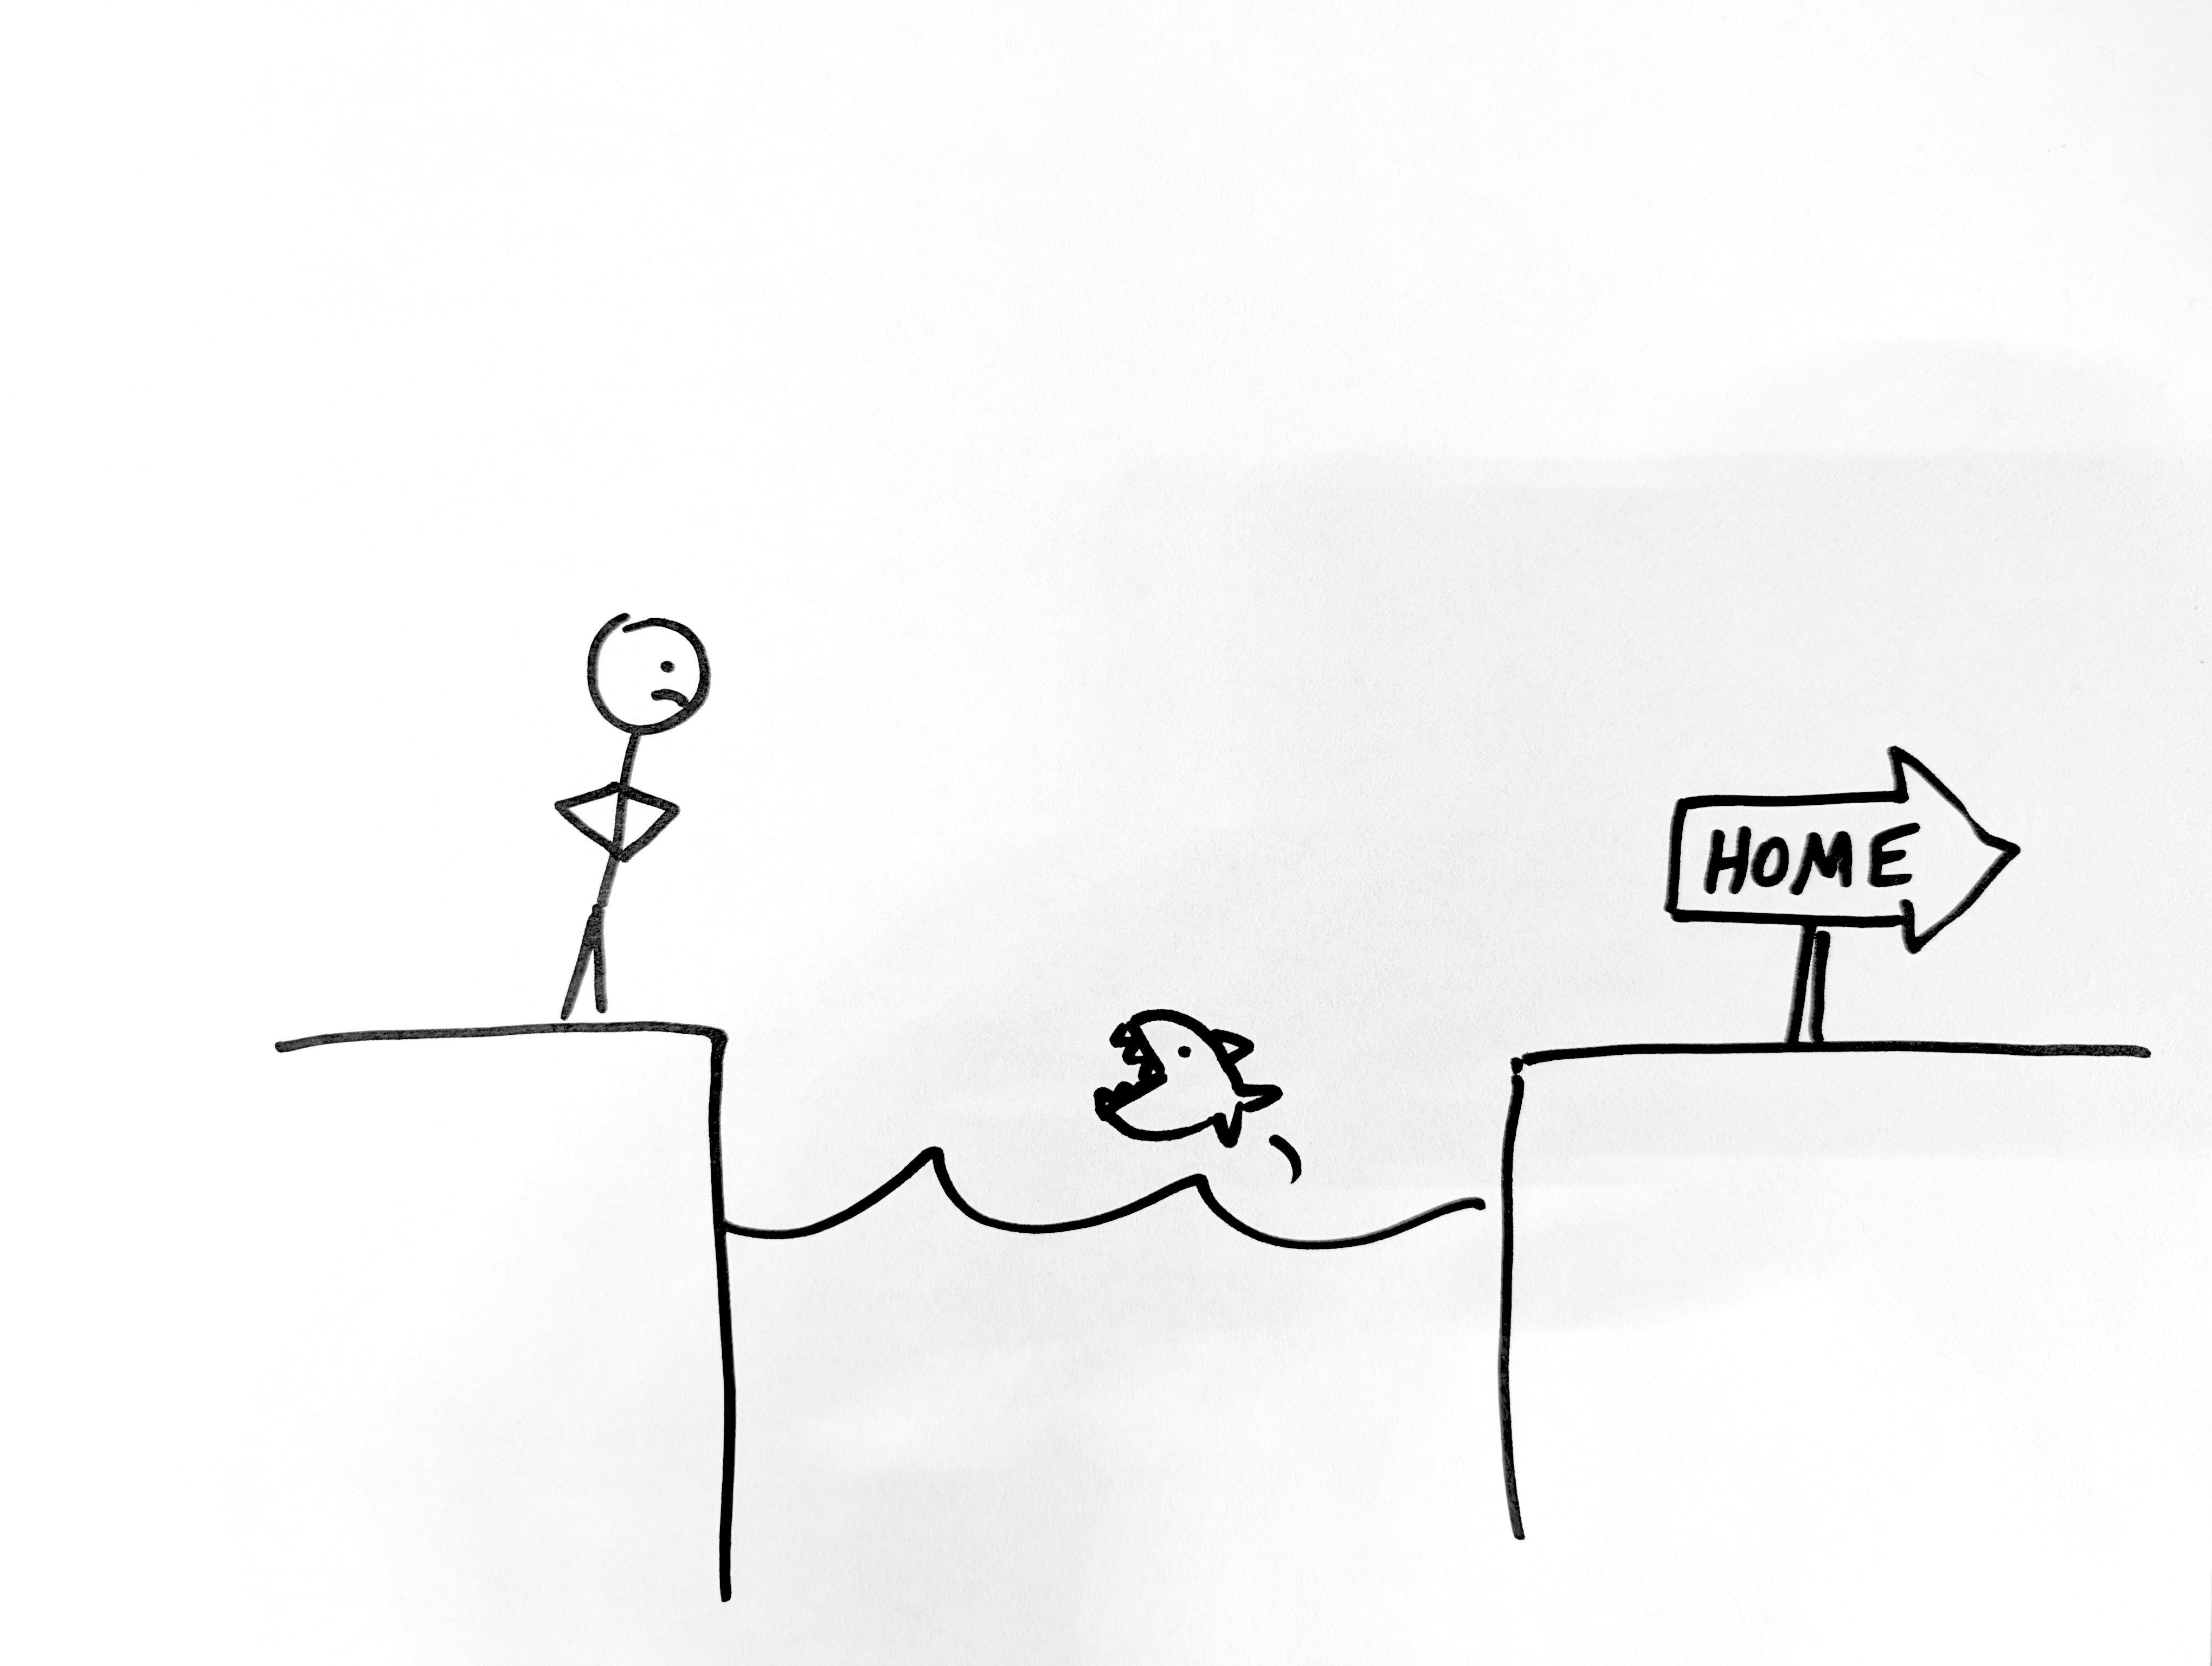

In [6]:
import PIL.Image

sample_file_2 = PIL.Image.open('piranha.jpg')
sample_file_2

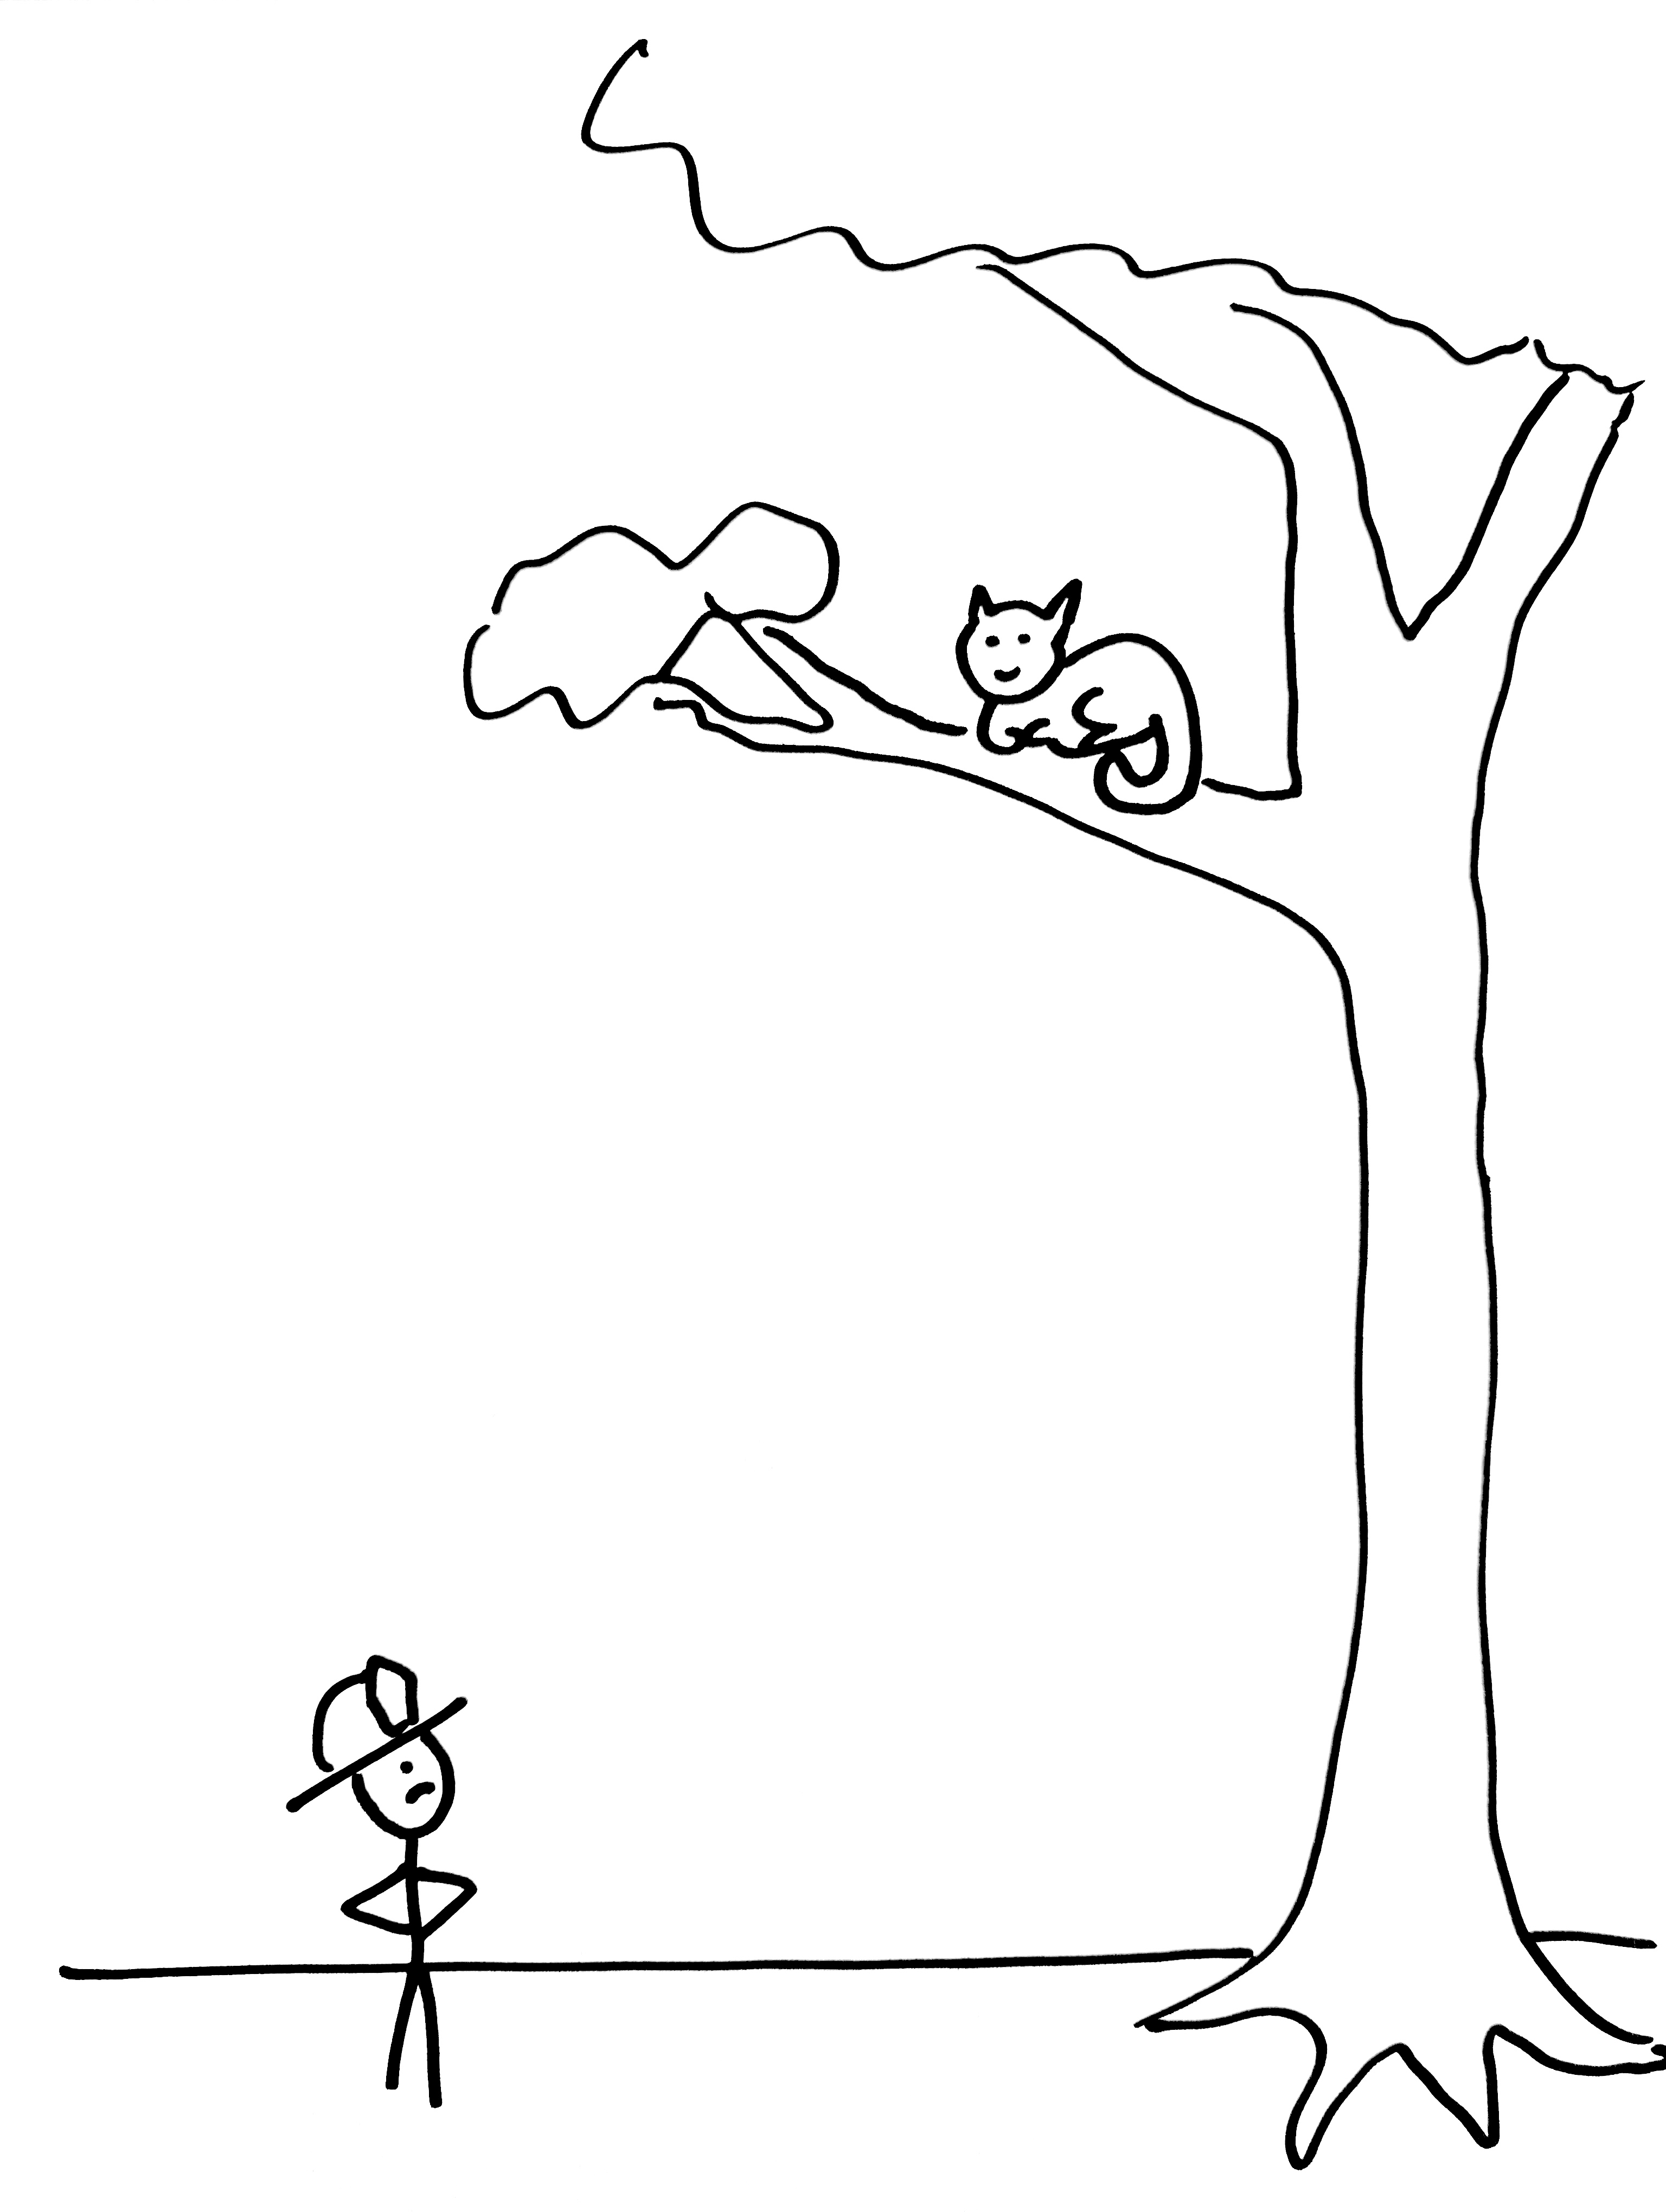

In [7]:
sample_file_3 = PIL.Image.open('firefighter.jpg')
sample_file_3

In [8]:
# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

prompt = "Write an advertising jingle showing how the product in the first image could solve the problems shown in the second two images."

response = model.generate_content([prompt, sample_file, sample_file_2, sample_file_3])

Markdown(">" + response.text)

>(Upbeat, adventurous music)

Stuck in a jam? Life got you down?
Shark in the water, can't reach the ground?
Kitty up high, no way to climb?
Don't waste your time, the answer is prime!

(Chorus)
Jetpack Backpack, it's here to save the day!
Just strap it on tight, and blast your cares away!
Fifteen minutes of power, green and clean, it's true,
With USB charging, you'll be soaring, too!

Don't let obstacles stand in your way,
With Jetpack Backpack, you'll conquer any fray!
So ditch the old methods, the ladders and boats,
Jetpack Backpack's the answer, from head to your toes! 


In [10]:
# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

prompt = "Return a bounding box for the piranha. \n [ymin, xmin, ymax, xmax]"
response = model.generate_content([sample_file_2, prompt])

print(response.text)

The bounding box for the piranha is [612, 494, 711, 624].


## Gemini with video

In [11]:
!wget https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4

--2024-07-27 17:32:47--  https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.165.27, 142.251.33.187, 142.251.32.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.165.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238090979 (227M) [video/mp4]
Saving to: ‘GreatRedSpot.mp4’

GreatRedSpot.mp4    100%[===================>] 227.06M  2.39MB/s    in 1m 59s  

2024-07-27 17:34:47 (1.90 MB/s) - ‘GreatRedSpot.mp4’ saved [238090979/238090979]



In [15]:
# Upload the video and print a confirmation.
video_file_name = "GreatRedSpot.mp4"

print(f"Uploading file...")
video_file = genai.upload_file(path=video_file_name)
print(f"Completed upload: {video_file.uri}")

Uploading file...
Completed upload: https://generativelanguage.googleapis.com/v1beta/files/dcv863e7grts


In [18]:
import time

# Check whether the file is ready to be used.
while video_file.state.name == "PROCESSING":
    print('.', end='')
    time.sleep(10)
    video_file = genai.get_file(video_file.name)

if video_file.state.name == "FAILED":
  raise ValueError(video_file.state.name)


In [19]:
# Create the prompt.
prompt = "Summarize this video. Then create a quiz with answer key based on the information in the video."

# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Make the LLM request.
print("Making LLM inference request...")
response = model.generate_content([video_file, prompt],
                                  request_options={"timeout": 600})

# Print the response, rendering any Markdown
Markdown(response.text)

Making LLM inference request...


The video talks about the changes that have been observed on Jupiter’s Great Red Spot. Scientists have noticed that the spot is shrinking, getting rounder, and its color is deepening. 

Initially, it was expected that as the spot shrank, the wind speeds inside it would increase, just like an ice skater spins faster as she pulls in her arms. However, data revealed that the storm isn't spinning faster; it's actually getting taller.

The Great Red Spot used to be big enough to fit three Earths, but now it's just a little over one. These discoveries were made by analyzing data from numerous NASA missions, including Voyager, Hubble, and most recently, Juno. Through more investigations, scientists hope to unlock more secrets of the mysterious Great Red Spot. 


**Quiz**

**1. What type of storm is the Great Red Spot?**
a) Hurricane
b) Cyclone
c) Anticyclone
d) Tornado

**2. What has happened to the size of the Great Red Spot over time?**
a) It has grown larger.
b) It has stayed the same size.
c) It has shrunk.
d) It has become more oval-shaped.

**3. What is happening to the wind speed inside the Great Red Spot as it shrinks?**
a) It is increasing.
b) It is decreasing.
c) It is staying the same.
d) It is fluctuating unpredictably.

**4. What is happening to the height of the Great Red Spot as it shrinks?**
a) It is becoming shorter.
b) It is becoming taller.
c) Its height is staying the same.
d) The height is unknown.

**5. Which NASA missions have provided data about the Great Red Spot?**
a) Voyager and Hubble
b) Voyager, Hubble, and Juno
c) Juno and Cassini
d) Only Voyager


**Answer Key**
1. c) Anticyclone
2. c) It has shrunk.
3. c) It is staying the same.
4. b) It is becoming taller.
5. b) Voyager, Hubble, and Juno 


In [21]:
# Create the prompt.
prompt = "What are the examples given at 01:05 and 01:19 supposed to show us?"

# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Make the LLM request.
print("Making LLM inference request...")
response = model.generate_content([prompt, video_file],
                                  request_options={"timeout": 600})
print(response.text)

Making LLM inference request...
The example given at 01:05, of an ice skater spinning faster as she pulls in her arms, is supposed to illustrate how the wind speeds inside the Great Red Spot were expected to increase as the storm shrinks. As the ice skater's mass becomes more concentrated, she spins faster. Similarly, as the storm shrinks in size, the winds would become more concentrated and therefore faster.

The example given at 01:19, of working with pottery, is supposed to illustrate the new discovery that, rather than spinning faster as it shrinks, the Great Red Spot is getting taller. As the wide lump of clay spins on the pottery wheel, it becomes taller. Similarly, as the storm shrinks in size, it is becoming taller rather than spinning faster. 



In [24]:
# Create the prompt.
prompt = "Transcribe the audio, giving timestamps. Also provide visual descriptions."

# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Make the LLM request.
print("Making LLM inference request...")
response = model.generate_content([prompt, video_file],
                                  request_options={"timeout": 600})
print(response.text)

Making LLM inference request...
The video shows a series of images and animations of the planet Jupiter.

[0:01] A still image of Jupiter in space. The planet is partially lit and can be seen surrounded by many stars.
[0:01] The narrator states, "Jupiter is the largest and oldest planet in our solar system."
[0:05] Same image as before.
[0:05] The narrator states, "Its history spans 4.5 billion years."
[0:10] Same image as before, but the planet grows larger as the camera zooms in.
[0:10] The narrator states, "This gas giant is made of the same elements as a star, but it did not grow massive enough to ignite."
[0:16] The camera keeps zooming in, and we can see the characteristic bands of Jupiter's atmosphere.
[0:18] Jupiter rotates to face us.
[0:18] The narrator states, "Jupiter's appearance is the result of its swirling interior of gasses and liquids, producing a tapestry of colorful cloud bands, as well as the iconic Great Red Spot."
[0:26] Jupiter continues rotating and the camera 

## List / delete upload files

In [25]:
# List all files
for file in genai.list_files():
    print(f"{file.display_name}, URI: {file.uri}")

GreatRedSpot.mp4, URI: https://generativelanguage.googleapis.com/v1beta/files/dcv863e7grts
Jetpack drawing, URI: https://generativelanguage.googleapis.com/v1beta/files/svnrkdz0w443
Jetpack drawing, URI: https://generativelanguage.googleapis.com/v1beta/files/o8iok7m2fhuq


In [ ]:
# Delete file
genai.delete_file(video_file.name)
print(f'Deleted file {video_file.uri}')